In [1]:
from sklearn.datasets import make_moons
#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25,
random_state=3)

In [2]:
from sklearn.model_selection import train_test_split
# 학습용:검증용 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, random_state=0)

In [3]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정나무모형
# criterion(entropy,gini)
model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='entropy')
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [4]:
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test))

 학습용: 0.9066666666666666
 검증용: 0.92


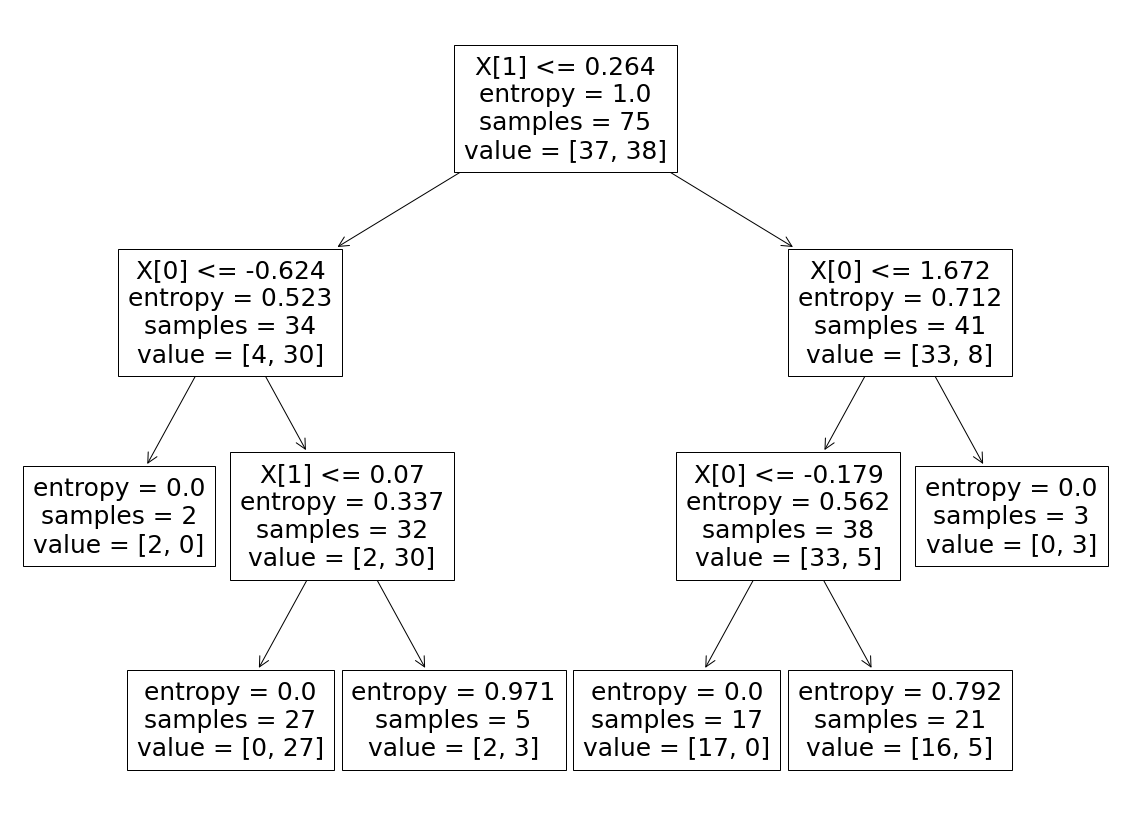

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(model)
plt.show()
# 동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 계속 나온다면 순도 최대
# 엔트로피 : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우 (불확실성 최소, 순도 최대 ) => 엔트로피 0
# 반반씩 섞여 있을 경우 (불확실성 최대, 순도 최소) => 엔트로피 1
#gini index(지니 계수) : 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대), 0.5이면 불확실성 최대, 순도 최소


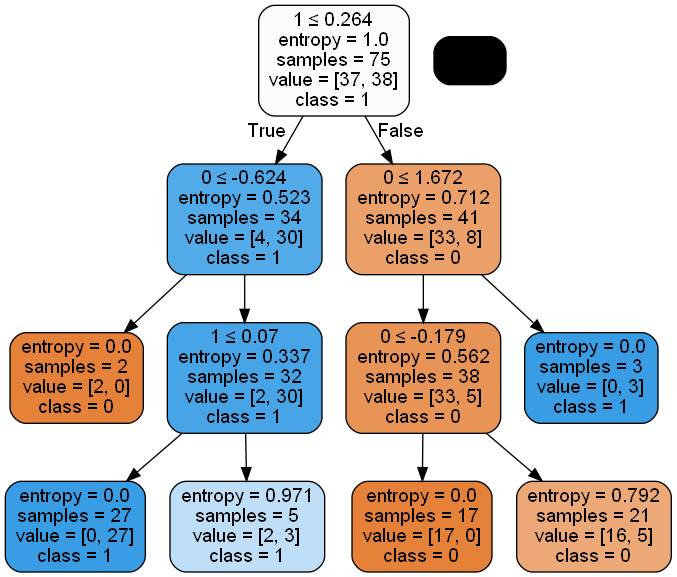

In [6]:
# graphviz exe 설치
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os
#os.environ["PATH"] += os.pathsep + 'C:/ProgramFiles/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
X[:,1]

array([ 0.56839425, -0.34894509,  0.10921819,  0.20291313,  0.53367598,
        0.08726406,  0.60498388,  0.49615542,  1.34740194,  0.87981305,
       -0.69665985,  0.83750547, -0.69709227,  0.12916271,  0.69106791,
       -0.40516241, -0.41396289,  0.78151982,  0.49400243, -0.06972957,
       -0.35425773,  0.73292915,  0.30808589,  0.33191968, -0.50593577,
       -0.05911358,  1.00820293, -0.19860992,  0.46412528,  0.60660877,
        0.50244086,  0.38686701,  0.80929512,  0.73004641,  0.32909081,
        0.51823046, -0.11030872, -0.06701048,  0.46769065,  0.5676387 ,
        1.16554689,  1.17004822,  0.74457804,  0.86330772,  0.33403724,
       -0.03063104, -0.36876898, -0.50411496, -0.16514053,  0.20934501,
       -0.01567029, -0.47647261, -0.08631168, -0.0555109 ,  0.75230462,
       -0.12578512, -0.33949903,  0.21114881,  0.40428146,  0.35840485,
        0.94421706,  0.13192906, -0.2525239 , -0.23820389, -0.38663896,
       -0.13364054,  0.50000529,  0.3628348 ,  0.72334582,  0.41

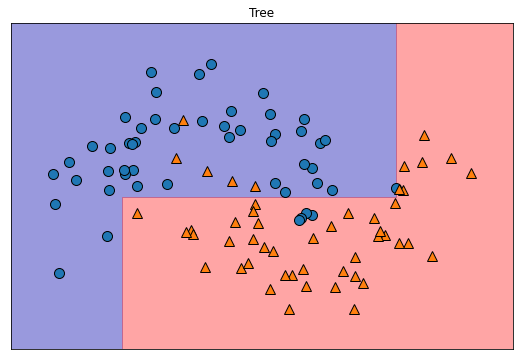

In [8]:
import mglearn
plt.figure(figsize=(9,6))
plt.title("Tree")
#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [9]:
#동전 던지기
from math import log2, ceil
# 확률 50% 
p = 0.5
# 이벤트 정보 계산
h = -log2(p)
print('확률 :',p)
print('정보량 :',h,ceil(h)) # 1bit로 표현 가능

확률 : 0.5
정보량 : 1.0 1


In [10]:
# 확률이 10% 라면
p = 0.1
# 이벤트 정보 계산
h = -log2(p)
print('확률 :',p) 
print('정보량 :',h,ceil(h)) #4bit 가 필요함

확률 : 0.1
정보량 : 3.321928094887362 4
